In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Visualization
import matplotlib.pyplot as plt

#Image Processing
import cv2

#Machine Learning
from sklearn.svm import SVC
from sklearn import metrics

#System
import os

#pickle untuk menyimpan dan memanggil model
import pickle

#library face_recognition
import face_recognition

# 1. face_locations

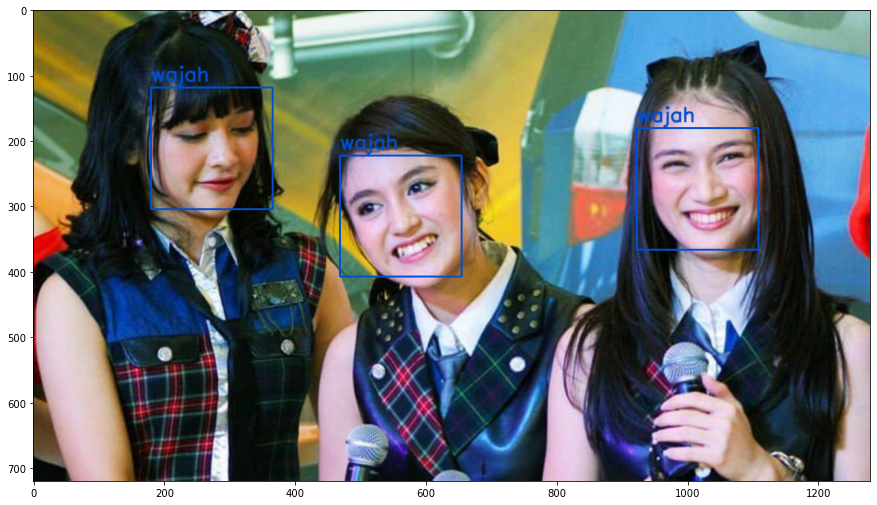

In [2]:
image_path = './images/JKT48/facetest/test_13.jpg'
face = face_recognition.load_image_file(image_path)
face_bounding_boxes = face_recognition.face_locations(face)

#menampilkan gambar dan membuat kotak (bounding box)
img=cv2.imread(image_path)
for (y1,x2,y2,x1) in face_bounding_boxes:
    cv2.rectangle(img,(x1,y1),(x2,y2),(209, 80, 0),2)
    cv2.putText(img,'wajah',(x1,y1-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (209, 80, 0), 2, cv2.LINE_AA)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 15))
plt.imshow(img_rgb)
plt.show()  

# 2. face_landmarks

In [3]:
image_path = './images/JKT48/6_face/14.jpg'
image = face_recognition.load_image_file(image_path)
landmarks = face_recognition.face_landmarks(image)

landmarks

[{'chin': [(14, 87),
   (20, 116),
   (29, 145),
   (41, 172),
   (58, 196),
   (80, 218),
   (102, 239),
   (126, 257),
   (152, 259),
   (177, 250),
   (198, 230),
   (215, 205),
   (229, 178),
   (237, 147),
   (238, 115),
   (238, 82),
   (234, 48)],
  'left_eyebrow': [(20, 64), (30, 48), (47, 41), (67, 40), (86, 44)],
  'right_eyebrow': [(121, 40), (138, 29), (159, 24), (181, 25), (201, 34)],
  'nose_bridge': [(107, 67), (109, 89), (112, 111), (115, 133)],
  'nose_tip': [(96, 142), (108, 145), (121, 148), (134, 141), (146, 134)],
  'left_eye': [(44, 79), (54, 74), (67, 72), (82, 76), (68, 78), (56, 79)],
  'right_eye': [(142, 67),
   (153, 59),
   (166, 56),
   (182, 57),
   (169, 61),
   (156, 64)],
  'top_lip': [(84, 175),
   (97, 169),
   (113, 164),
   (128, 164),
   (141, 158),
   (164, 157),
   (187, 159),
   (182, 162),
   (144, 165),
   (130, 170),
   (116, 170),
   (90, 176)],
  'bottom_lip': [(187, 159),
   (172, 189),
   (153, 203),
   (138, 207),
   (123, 208),
   (104

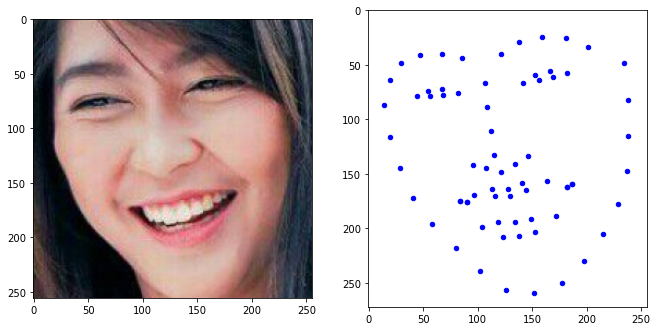

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(11, 11)

#Draws landmarks around an image
xs = []
ys = []

for landmark in landmarks:
    for k, v in landmark.items():
        xs += [x[0] for x in v]
        ys += [x[1] for x in v]

axes[0].imshow(image)
axes[1].imshow(np.ones(image.shape))
axes[1].scatter(x=xs, y=ys, c='b', s=20)


# 3. face_encodings

In [5]:
image_path = './images/JKT48/6_face/14.jpg'
image = face_recognition.load_image_file(image_path)
face_enc = face_recognition.face_encodings(face)[0]
face_enc

array([-0.17170475,  0.06679151,  0.14087835, -0.13211066, -0.10201091,
        0.02056347, -0.06568074, -0.08170008,  0.11126782, -0.15876599,
        0.20107681, -0.13078262, -0.21426915,  0.10305139, -0.07853121,
        0.23884793, -0.12740666, -0.14800476, -0.04480342, -0.05439319,
        0.03117161,  0.06868042, -0.01871349,  0.00098788, -0.14066224,
       -0.3858155 , -0.1154836 , -0.01886301, -0.03710207,  0.00672296,
        0.00715186,  0.04833674, -0.18619817,  0.01498638,  0.02475825,
        0.1190059 , -0.04302194, -0.15192494,  0.1597718 ,  0.01591302,
       -0.27638155,  0.0481435 ,  0.09312207,  0.27087271,  0.13362485,
        0.03146642,  0.01089604, -0.13052669,  0.03824661, -0.23952511,
        0.03115239,  0.06406456,  0.04278594,  0.05285525,  0.04836316,
       -0.10630792,  0.07127334,  0.14553417, -0.23283429, -0.04009541,
        0.04291241, -0.04949103,  0.06772495, -0.18357405,  0.2661854 ,
        0.14133251, -0.11069104, -0.1518883 ,  0.18303725, -0.09

# 4. face_distance

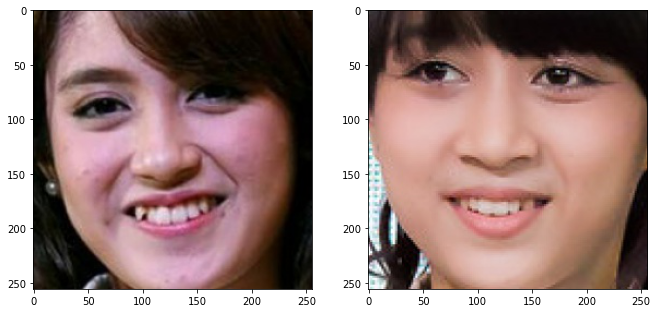

In [6]:
nabilah_path = './images/JKT48/1_face/14.jpg'
nabilah_image = face_recognition.load_image_file(nabilah_path)
nabilah_encodings = face_recognition.face_encodings(nabilah_image)[0]

ayana_path = './images/JKT48/3_face/14.jpg'
ayana_image = face_recognition.load_image_file(ayana_path)
ayana_encodings = face_recognition.face_encodings(ayana_image)[0]

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(11, 11)

axes[0].imshow(nabilah_image)
axes[1].imshow(ayana_image)

jarak dari test image ke foto Nabilah = 0.5862194870449283
jarak dari test image ke foto Ayana = 0.2145929325494069


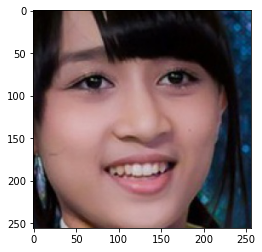

In [7]:
test_path = './images/JKT48/3_face/10.jpg'
test_image = face_recognition.load_image_file(test_path)
test_encodings = face_recognition.face_encodings(test_image)[0]

plt.imshow(test_image)

#menghitung jarak antar image

#jarak ke image nabilah
distance_to_nabilah = face_recognition.face_distance([nabilah_encodings], test_encodings)
print ("jarak dari test image ke foto Nabilah = " + str(distance_to_nabilah[0]))

#jarak ke image ayana
distance_to_ayana = face_recognition.face_distance([ayana_encodings], test_encodings)
print ("jarak dari test image ke foto Ayana = " + str(distance_to_ayana[0]))

# 5. compare_faces

In [8]:
results = face_recognition.compare_faces([ayana_encodings, nabilah_encodings], test_encodings)
results

[True, True]

In [9]:
results = face_recognition.compare_faces([ayana_encodings, nabilah_encodings], test_encodings, 0.6)
results

[True, True]

In [10]:
results = face_recognition.compare_faces([ayana_encodings, nabilah_encodings], test_encodings, 0.4)
results

[True, False]

In [11]:
results = face_recognition.compare_faces([ayana_encodings, nabilah_encodings], test_encodings, 0.2)
results

[False, False]